In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
company = pd.read_csv("C:/Users/H P/Desktop/ANACONDA/DESCISION TREE/ASSIGNMENT/Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
pd.isnull(company).sum() > 0

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [4]:
bins = [0,10,15,20]
group_names = ['Good','Better','Best']

In [5]:
company['Sales'] = pd.cut(np.array(company.Sales),bins,labels=group_names)
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Good,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Better,111,48,16,260,83,Good,65,10,Yes,Yes
2,Better,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Good,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Good,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Better,138,108,17,203,128,Good,33,14,Yes,Yes
396,Good,139,23,3,37,120,Medium,55,11,No,Yes
397,Good,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Good,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [7]:
x = company.iloc[:,1:11]
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [8]:
pd.isnull(x).sum() > 0

CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [9]:
x.isna().head()
x.fillna(value=1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [10]:
y = company.iloc[:,0] 

In [11]:
y.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: Sales, Length: 400, dtype: bool

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [13]:
x_train = x_train.fillna(x_train.mean())

In [14]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

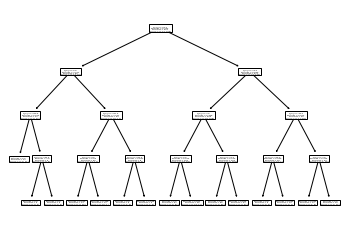

In [16]:
tree.plot_tree(model);

TypeError: 'list' object is not callable

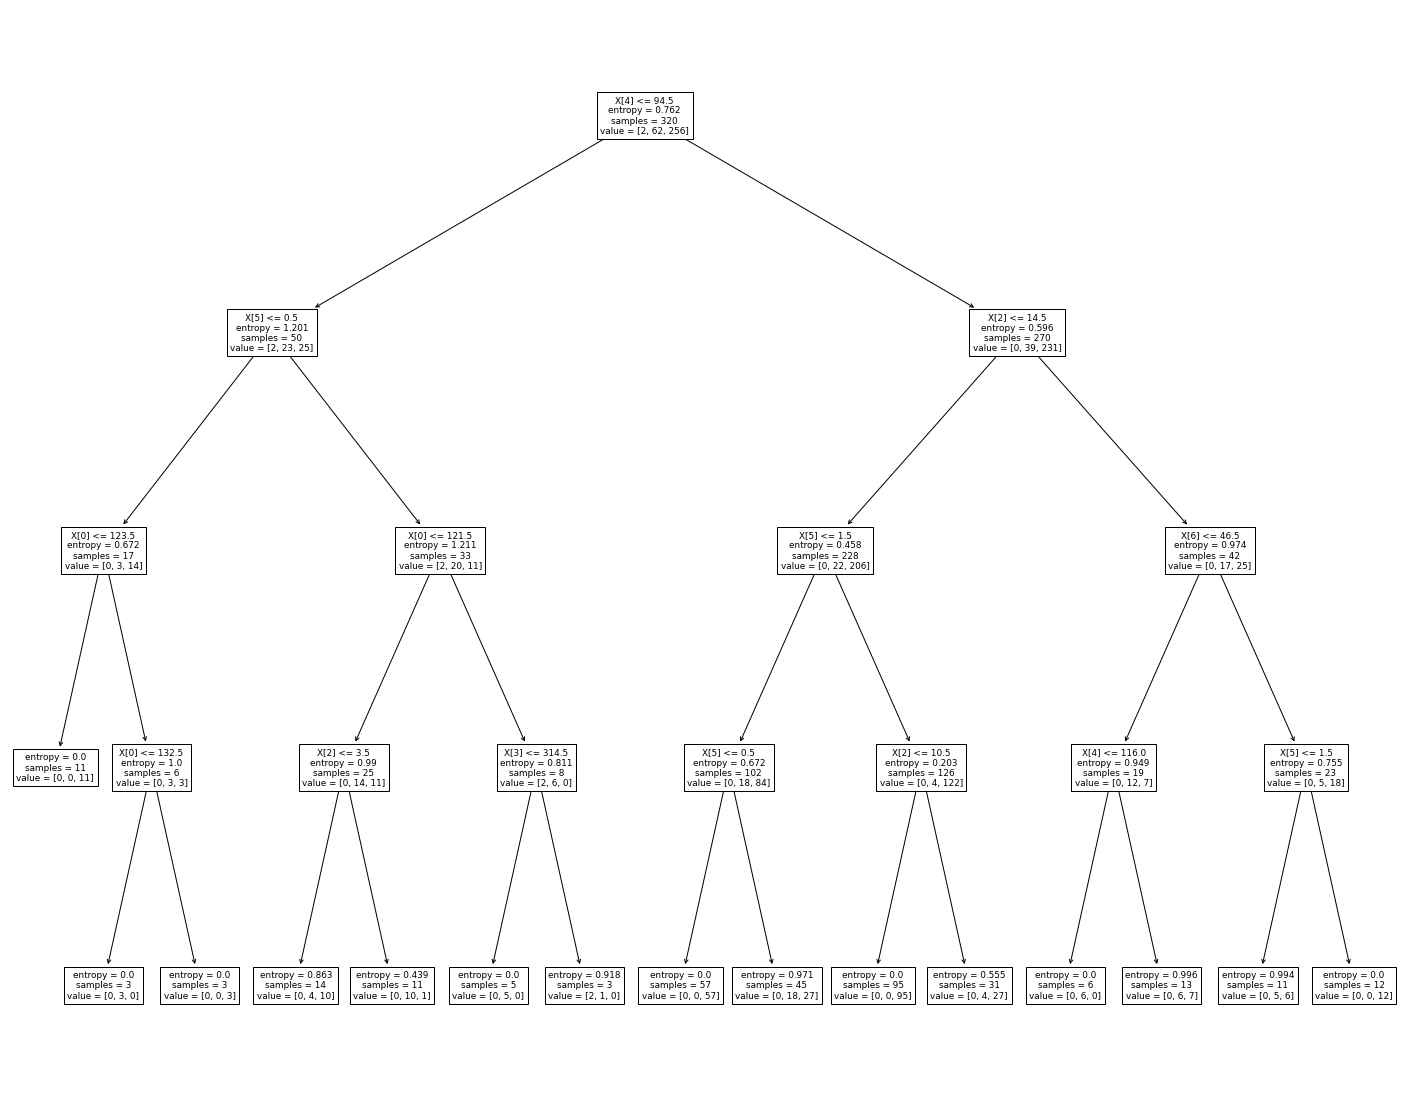

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model)(model, 
                   feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'],  
                   class_names=company.Sales,
                   filled=True)
fig.savefig("decistion_tree.png")

In [24]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.3,random_state=40)

In [25]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

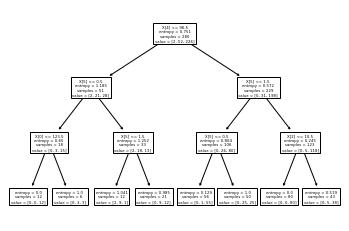

In [26]:
tree.plot_tree(model1);

TypeError: 'list' object is not callable

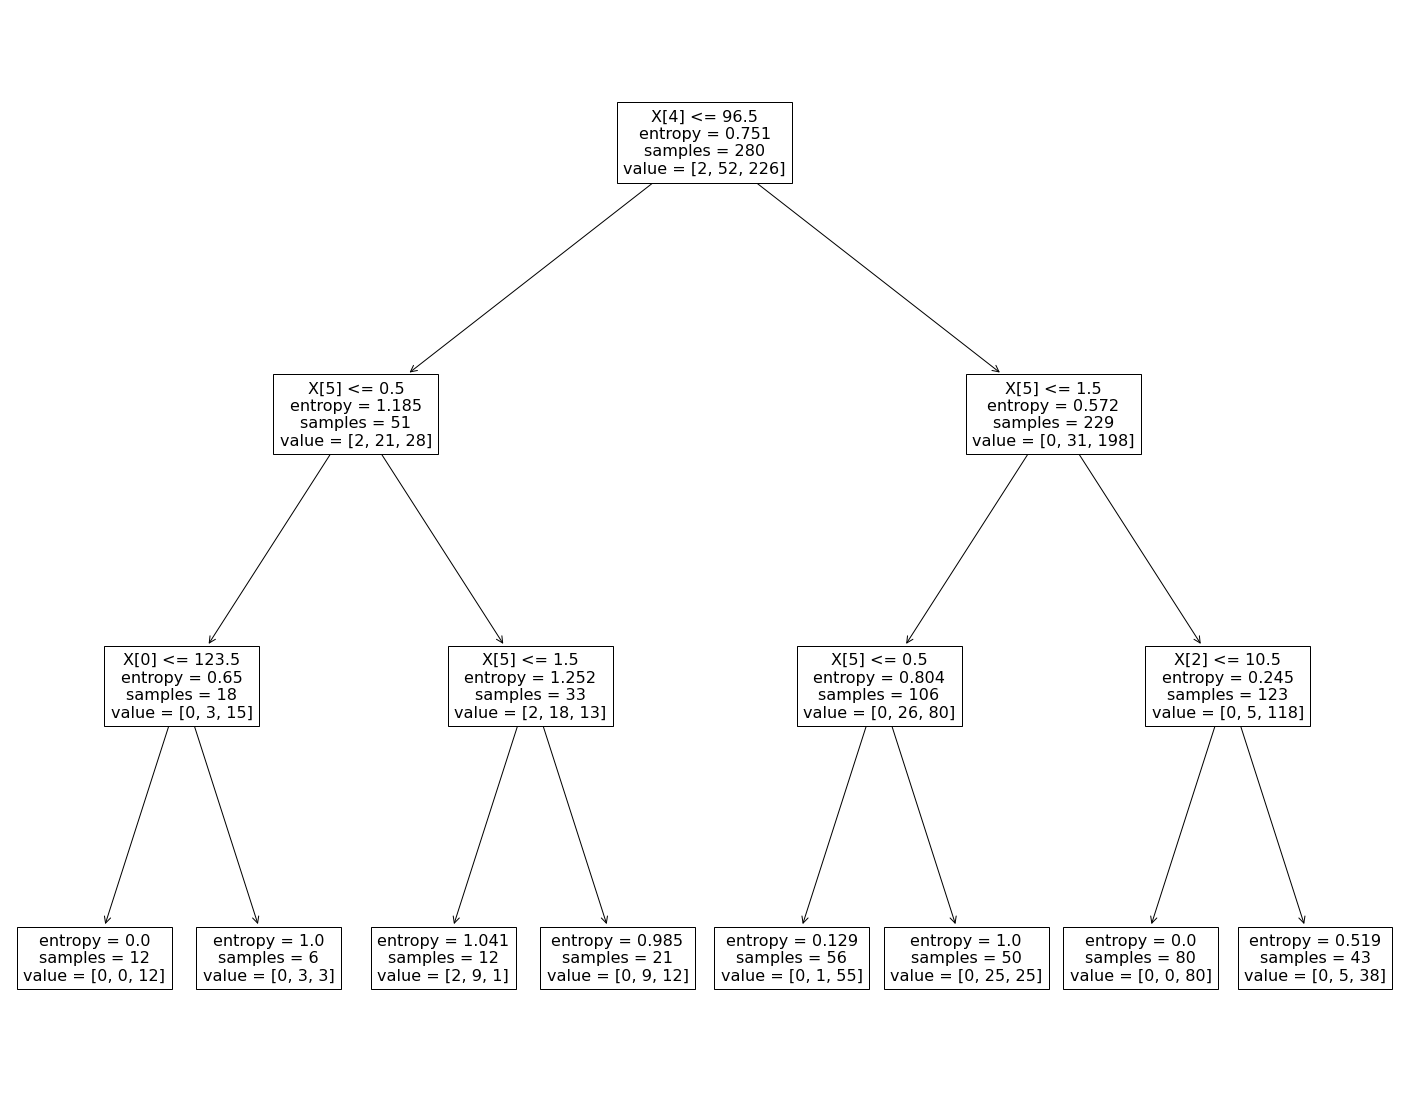

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1)(model1, 
                   feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'],  
                   class_names=company.Sales,
                   filled=True)
fig.savefig("decistion_tree.png")

In [28]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.4,random_state=40)

In [29]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model2.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

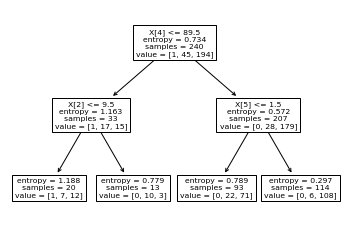

In [30]:
tree.plot_tree(model2);

TypeError: 'list' object is not callable

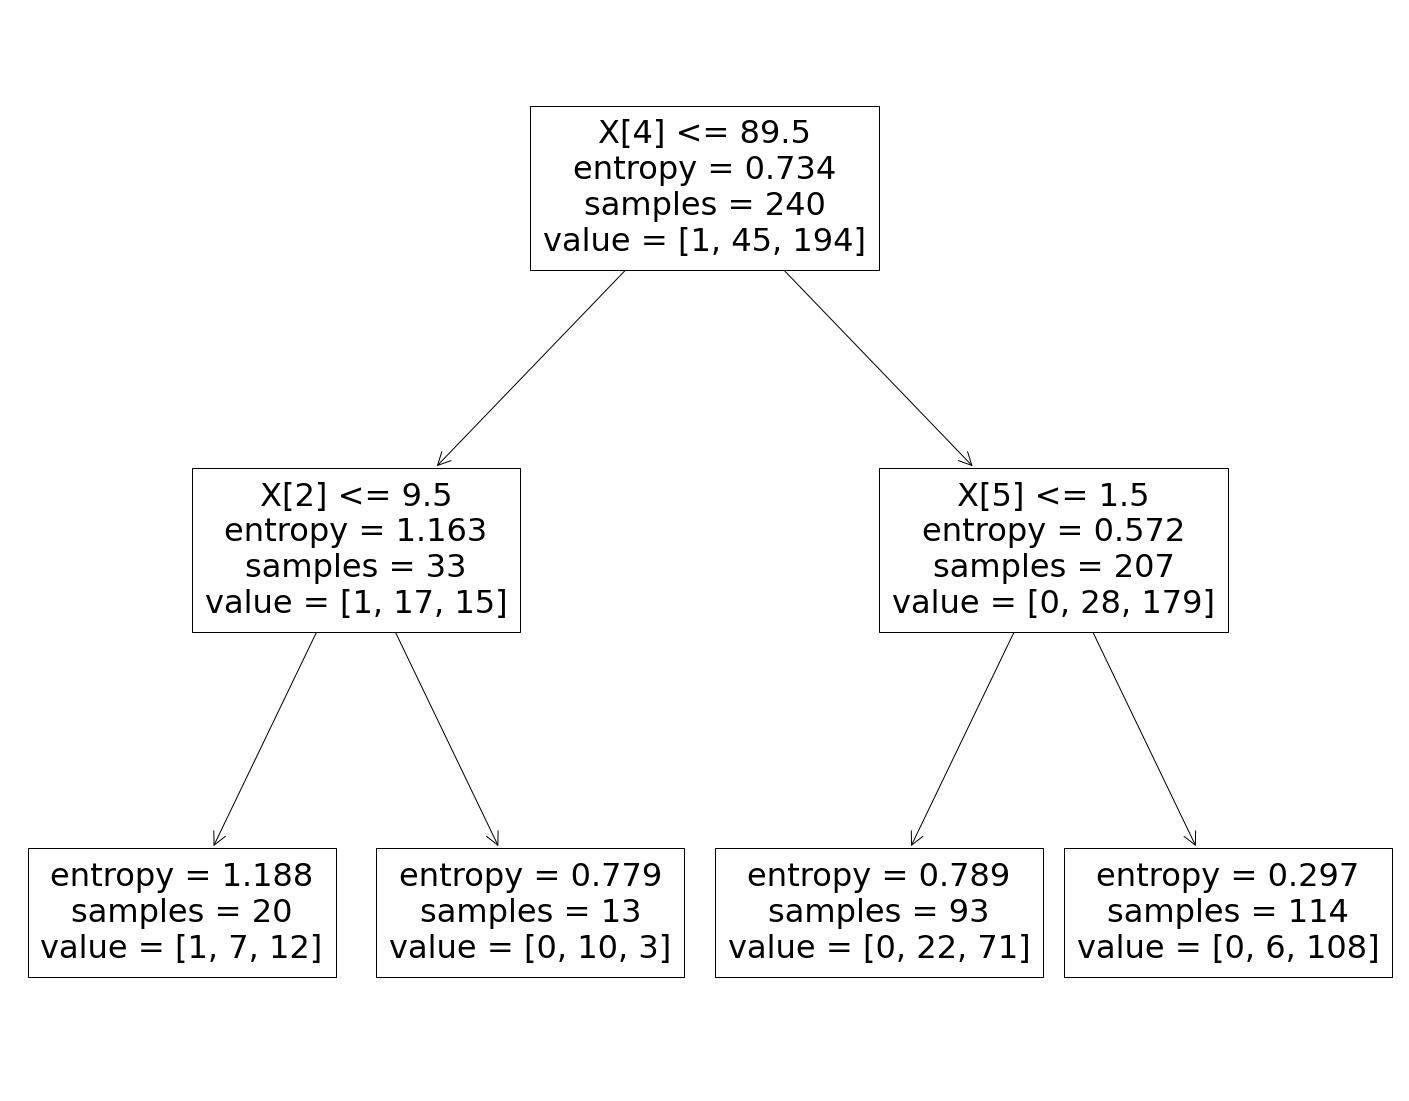

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2)(model2, 
                   feature_names=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'],  
                   class_names=company.Sales,
                   filled=True)
fig.savefig("decistion_tree.png")

In [ ]:
#In all the models the aim is to find the root node for the data from which its split, the data may be split into testing 
#and training datasets and to find the entropy , the entropy should be close to 0. The depth of the tree can be specified 
#from which the model is created upto that value.